# Exploration du corpus

## Imports

In [71]:
from collections import defaultdict
import os

import matplotlib.pyplot as plt
import numpy as np

In [72]:
path = "../../data/camille_syndicalisme/"
files = sorted(os.listdir(path))
len(files)

520

## Explorer les noms de fichier

In [73]:
chaine = 'KB_JB838_1960-01-07_01-00003'
type(chaine)

str

In [74]:
# la méthode split
chaine_split = chaine.split('_')
chaine_split

['KB', 'JB838', '1960-01-07', '01-00003']

In [75]:
# Accéder à la date
date = chaine_split[2]

# Accéder à l'année
date_split = date.split('-')
year = date_split[0]
date_split

['1960', '01', '07']

In [76]:
# Manipuler les str pour convertir une année en décennie
year[:3]

'196'

In [77]:
year[-1]

'0'

In [78]:
year[:3] + '0s'

'1960s'

In [79]:
all_years = [str(year) for year in range(1960, 1969)]

In [80]:
count_decade = defaultdict(int)
count_month = defaultdict(int)
count_newspapers = defaultdict(int)
covered_years = set()

for f in files:
    if "_" in f and f.endswith("txt"):
        elems = f.split("_")
        
        newspaper = elems[1]
        
        year = elems[2].split("-")[0]
        covered_years.add(year)
        decade = year[:3] + "0s"
        
        month = int(elems[2].split("-")[1])
        
        count_decade[decade] += 1
        count_newspapers[newspaper] += 1
        count_month[month] += 1
    else:
        print(f"Anomalous file: {f}")

## Visualisation du nombre de journaux par mois

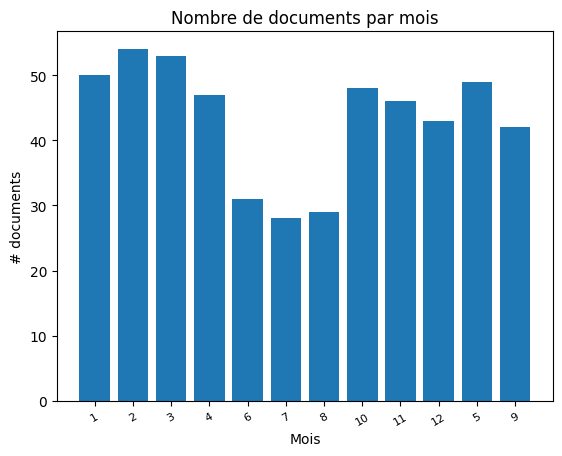

In [81]:
index = np.arange(len(count_month))
plt.bar(index, count_month.values())
plt.xlabel('Mois')
plt.ylabel('# documents')
plt.xticks(index, count_month.keys(), fontsize=8, rotation=30)
plt.title('Nombre de documents par mois')
plt.show()

# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [82]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fabio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [83]:
# Stopwords + mots fréquents inutiles
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "pers", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "voire", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "bruxelles", "brux", "chambre",
       "maison", "rue", "villa", "tél", "téléph", "prix", "louer", "lieu", "midi", "devant",
       "bon", "très", "déjà", "vers", "long", "lundi", "mardi", "mercredi", "jeudi", "vendredi",
       "samedi", "dimanche", "leurs", "chaque", "quelque", "année", "place", "grand",
       "agence", "ans", "ecr", "ecrire", "part", "heures", "vendre", "jour", "mod",
       "cours", "belgique", "pays", "francs", "belge", "grande", "petite", "petit",
       "toute", "faç", "soir", "compte", "il", "elle", "elles", "anvers", "namur", "liège",
       "appart", "rapp", "garage", "cas", "prés", "heure", "janvier", "février", "mars", "avril",
       "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre", "premier",
       "gros", "alors", "dès", "cent", "vend", "demande", "référ", "lot", "achat", "cher", "bonne",
       "peu", "beaucoup", "avant", "tant", "trav", "suite", "vingt", "bat", "parmi", "aujourd",
       "mois", "etc", "vente", "nord", "cherche", "avenue", "temps", "quelques", "jours", "partie",
       "beau", "belle", "comm", "jamais", "près", "point", "mme", "app", "jardin", "jard",
       "cap", "centre", "sud", "ouest", "est", "env", "haut", "dame", "homme", "fem", "fort",
       "divers", "grands", "cour", "chez", "jean", "hommes", "femmes","plusieurs", "vient",
       "celui", "matin", "question", "bureau", "mat", "bas", "pris", "gar", "car",
       "min", "dernier", "trop", "début", "dan", "reste", "lequel", "laquelle", "ceux", "celles",
       "première", "argent", "succès", "semaine", "quand", "nom", "but", "max", "série", "hui",
       "un", "deux", "trois", "quatre", "cinq", "six", "sept", "huit", "neuf", "dix", "serv",
       "fois", "fit", "cependant", "int", "annoncer", "nombreux", "nombreuses", "téléphone",
       "demi", "quart", "seul", "seule", "rez", "atelier", "services", "chaussée", "ailleurs",
       "seulement", "départ", "parti", "entrée", "nombre", "fille", "occasion", "offre",
       "rien", "sér", "service", "mètres", "avis", "dos", "tandis", "offres", "auto", "chêne",
       "résultat", "cont", "culs", "notamment", "eau", "dés", "résultats", "voiture", "pet",
       "assez", "louvain", "partir", "bons", "main", "noir", "étage", "mén", "ire", "bur", "réf",
       "adresser", "main", "article", "club", "enfin", "journée", "journées", "produits", "mons",
       "enf", "également", "monsieur", "madame", "nuit", "conditions", "importante",
       "paul", "sup", "ord", "com", "façon", "ménage", "commune", "mlle", "côté", "joseph", "louis",
       "henri", "bel", "séance", "sujet", "article", "mieux", "ach", "lors", "meubles", "camion",
       "malgré", "effet", "mot", "beaux", "puis", "cond", "titre", "vis", "mol", "concret", "gens",
       "gand", "haute", "courant", "ixelles", "anderlecht", "schaerbeek", "uccle", "pierre",
       "situation", "rem", "lux", "mach", "suivant", "direction", "dames", "grandes", "marie",
       "femme", "mari", "tient", "parc", "jette", "hôtel", "petits", "diverses", "actuellement",
       "louise", "prochain", "membres", "bols", "petites", "lots", "font", "adr", "forest",
       "georges", "écrit", "environ", "peuvent", "jne", "âge", "quant", "selon", "magasin",
       "affaires", "acheteur", "acheteurs", "affaire", "parce", "tapis", "groupe", "vieux", "jeunes",
       "achet", "doivent", "mesure", "tonnes", "waterloo", "fils", "tête", "millions", "pourrait",
       "heu", "moment", "double", "outre", "inst", "jeunes", "années", "chamb", "pied", "aven",
       "semble", "sens", "den", "sait", "forme", "matériel", "salle", "jeune", "off", "bureaux",
       "pièces", "poids", "étalent", "meub", "unique", "souvent", "hier", "lorsque", "points", "art"]

#ajout de stopwords et mots fréquents donnés par chatgpt
extra_sw = [
    "afin", "aucun", "aucune", "auquel", "auxquels", "auxquelles", "ceci", "cela", "celui-ci",
    "celle-ci", "ceux-ci", "celles-ci", "chacun", "chacune", "certains", "certaines", "difficile",
    "ensemble", "ensuite", "exact", "exacte", "exactement", "hormis", "ici", "là", "la", "lesquels",
    "lesquelles", "loué", "louée", "louées", "loués", "location", "même", "mêmes", "nécessaire",
    "nécessaires", "nouveau", "nouvelle", "nouvelles", "nouveaux", "parfois", "partout", "pendant",
    "personne", "personnes", "plusieurs", "possible", "possibles", "près", "proche", "proches", 
    "propos", "quasi", "quiconque","région", "secteur", "surface", "surtout", "tel", "telle", "tels",
    "telles", "toujours", "trouver", "trouvé", "trouvée", "vers", "voir", "voici", "voilà",
    
    # Variantes utiles pour annonces belges / FR
    "bxl", "bxl.", "brussel", "andr", "prox", "quartier", "immeuble", "immeubles", "habitation",
    "habitations", "annonce", "annonces", "annoncé", "annoncée", "situé", "située", "situées",
    "situés", "neuf", "neuve", "neufs", "neuves", "ancien", "ancienne", "anciens", "anciennes",

    # Mots très fréquents mais peu utiles
    "afin", "tellement", "quasi", "tard", "tôt", "loin", "haut", "bas", "grand", "petit", "grosse", "petites",

    # Articles & formes conjuguées additionnelles
    "au", "aux", "du", "des", "aux", "leurs", "vos", "nos", "mon", "ton", "son",
    "ma", "ta", "sa", "mes", "tes", "ses", "notre", "votre", "leurs",

    # Autres verbes très fréquents
    "mettre", "mis", "mise", "mises", "trouver", "trouve", "trouvée", "trouvées",
    "voir", "vu", "vue", "vues", "donner", "donne", "donné", "venir", "venu", "venue",
]
sw += extra_sw
sw = set(sw)


In [84]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

675 stopwords:
 ['ach', 'achat', 'achet', 'acheteur', 'acheteurs', 'actuellement', 'adr', 'adresser', 'affaire', 'affaires', 'afin', 'agence', 'ai', 'aie', 'aient', 'aies', 'ailleurs', 'ainsi', 'ait', 'alors', 'ancien', 'ancienne', 'anciennes', 'anciens', 'anderlecht', 'andr', 'annonce', 'annoncer', 'annonces', 'annoncé', 'annoncée', 'année', 'années', 'ans', 'anvers', 'août', 'app', 'appart', 'après', 'argent', 'art', 'article', 'as', 'assez', 'atelier', 'au', 'aucun', 'aucune', 'aujourd', 'auquel', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'auto', 'autre', 'autres', 'aux', 'auxquelles', 'auxquels', 'avaient', 'avais', 'avait', 'avant', 'avec', 'aven', 'avenue', 'avez', 'aviez', 'avions', 'avis', 'avoir', 'avons', 'avril', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bas', 'bat', 'beau', 'beaucoup', 'beaux', 'bel', 'belge', 'belgique', 'belle', 'bien', 'bols', 'bon', 'bonne', 'bons', 'brussel', 'br

## Tokeniser

In [85]:
txt_path = '../../data/camille_syndicalisme'
if not os.path.exists(txt_path):
    os.mkdir(txt_path)

In [86]:
txts = []
for f in os.listdir(txt_path):
    if os.path.isfile(os.path.join(txt_path, f)):
        txts.append(f)
txts[:10]

['KB_JB838_1960-01-07_01-00003.txt',
 'KB_JB838_1960-01-10_01-00002.txt',
 'KB_JB838_1960-01-30_01-00007.txt',
 'KB_JB838_1960-02-11_01-00002.txt',
 'KB_JB838_1960-02-16_01-00007.txt',
 'KB_JB838_1960-02-25_01-00005.txt',
 'KB_JB838_1960-02-27_01-00002.txt',
 'KB_JB838_1960-03-23_01-00006.txt',
 'KB_JB838_1960-04-12_01-00009.txt',
 'KB_JB838_1960-06-05_01-00003.txt']

In [87]:
with open("../../data/allsyndicalisme.txt", "w", encoding="utf-8") as output_file:
    for file in os.listdir(txt_path):
        if file.endswith(".txt"):
            with open(os.path.join(txt_path, file), "r", encoding="utf-8") as f:
                output_file.write(f.read())


In [88]:
# Récupération du contenu du fichier
path = "../../data/allsyndicalisme.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [89]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

4441325 words found


In [90]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

1335834 words kept (145296 different word forms)


In [91]:
fdist = nltk.FreqDist(kept)
fdist.most_common(20)

[('ministre', 4107),
 ('président', 3854),
 ('gouvernement', 3521),
 ('politique', 3104),
 ('général', 2566),
 ('conseil', 2404),
 ('etat', 1947),
 ('travail', 1924),
 ('paris', 1920),
 ('loi', 1888),
 ('saint', 1742),
 ('france', 1735),
 ('ordre', 1662),
 ('nationale', 1653),
 ('problèmes', 1582),
 ('monde', 1553),
 ('projet', 1541),
 ('enfants', 1537),
 ('vie', 1486),
 ('commission', 1478)]

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

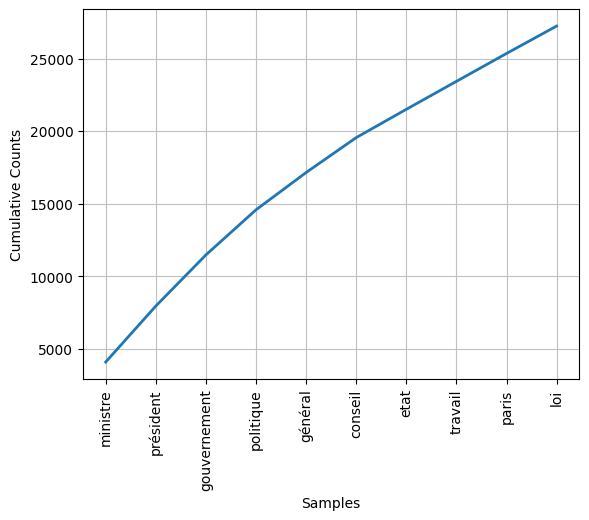

In [92]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

# Extraction de Keywords

## Imports

In [93]:
import os
import yake

## Extraire les mots clés d'un document avec Yake

In [94]:
# Instantier l'extracteur de mots clés
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)
kw_extractor

In [95]:
# Lister les Fichiers
data_path = "../../data/camille_syndicalisme"
files = [f for f in os.listdir(data_path) if f.endswith('.txt')]

In [96]:
# Imprimer le nombre de fichiers identifiés
len(files)

520

In [97]:
# Choisir un fichier
this_file = files[0]
this_file

'KB_JB838_1960-01-07_01-00003.txt'

In [98]:
# Récupérer le texte du fichier
text = open(os.path.join(data_path, this_file), 'r', encoding='utf-8').read()
text[:500]

"JEUDI 7 JANVIER 1960 - LE som «HW IS ^'èrc, !c U . ré. paj. ’évl. peut cder n d our. > des I sont un icile, arce ab- des j'en ! j'y !S..., fin. îifie Rire îSSi. peut avec e et ?..., sans ème au- Réactions contre la croix gammée Des voix commencent à s’élever contre les actes d’antisémitisme Bonn décide des mesures de répression Genève, 0 Janvier (A. P.) Le Conseil mondial des Églises a I lancé un appel pour la répression immédiate de l’antisémitisme et a S demandé à ses membres de renon- i cer à"

In [99]:
# Extraire les mots clés de ce texte
keywords = kw_extractor.extract_keywords(text)
keywords

[('JANVIER', np.float64(0.00537311925228842)),
 ('président', np.float64(0.009872367276772464)),
 ('d’autre part', np.float64(0.01170233571698091)),
 ('croix gammées', np.float64(0.012005107425747622)),
 ('mercredi', np.float64(0.014066954957932221)),
 ('ministre', np.float64(0.0181982848909021)),
 ('soir', np.float64(0.019940694264508223)),
 ('d’une', np.float64(0.02164295020537809)),
 ('parti', np.float64(0.02182504239491501)),
 ('croix', np.float64(0.022778775316704098)),
 ('mardi soir', np.float64(0.02305551187332923)),
 ('pays', np.float64(0.024941876738731987)),
 ('d’un', np.float64(0.02507570302292474)),
 ('qu’il', np.float64(0.025105380078404835)),
 ('Conseil', np.float64(0.025932525798336582)),
 ('mercredi soir', np.float64(0.026876825069039326)),
 ('part', np.float64(0.02713067648101709)),
 ('Londres', np.float64(0.02885744641574957)),
 ('d’autre', np.float64(0.02926744184226985)),
 ('TABLE RONDE', np.float64(0.029365697956751417)),
 ('Bonn', np.float64(0.029580451736694848))

In [100]:
# Ne garder que les bigrammes
kept = []
for kw, score in keywords:
    words = kw.split()
    if len(words) == 2:
        kept.append(kw)
kept

['d’autre part',
 'croix gammées',
 'mardi soir',
 'mercredi soir',
 'TABLE RONDE',
 'Etats fédérés',
 'Conseil mondial',
 'délégués belges',
 'Congo belge']

## Faire la même opération sur tous les documents

In [101]:
for f in sorted(files)[:10]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1960-01-07_01-00003.txt mentions these keywords: d’autre part, croix gammées, mardi soir, mercredi soir, TABLE RONDE, Etats fédérés, Conseil mondial, délégués belges, Congo belge...
KB_JB838_1960-01-10_01-00002.txt mentions these keywords: lit Aldous, lignes Florennes, Juge Othon, Huxley III, Aldous Huxley, Van Bever, Brésil Central, Fédération bruxelloise, MATO GROSSO, Santé publique...
KB_JB838_1960-01-30_01-00007.txt mentions these keywords: JAPON ÉCLATE, Japon n’est, METAL ARGENTÉ, Japon moderne, Maison Wolfers, l’usine Japon, Grandes Editions, Etablissements Braconnier, Etablissements Louis, Jacques Danois, Jacques Courtois, bas salaires...
KB_JB838_1960-02-11_01-00002.txt mentions these keywords: QUART D'HEURE, D'HEURE avec., SOIR JEUDI, Jean MERCURE, grandes compagnies, Graham Greene, GRANDE EUROPE, Belgique d’une, mardi soir...
KB_JB838_1960-02-16_01-00007.txt mentions these keywords: Lee Konitz, braves petits, Progrès social, jeu fort, Pierre Brasseur, Byron Janis, Da